In [363]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
%matplotlib inline 

color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [450]:
#!pip install plotly

In [252]:
%run ../paths.py
CONST = CONST()

In [527]:
train = pd.read_csv(CONST.CLEANED_TRAIN)
test = pd.read_csv(CONST.CLEANED_TEST)

In [528]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42144 entries, 0 to 42143
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             42144 non-null  int64  
 1   Unnamed: 0.1           42144 non-null  int64  
 2   tweet                  42144 non-null  object 
 3   class                  42144 non-null  int64  
 4   hashtags               42144 non-null  int64  
 5   user                   42144 non-null  int64  
 6   allcaps                42144 non-null  int64  
 7   stop_word_count        42144 non-null  int64  
 8   num_exclamation_marks  42144 non-null  int64  
 9   num_question_marks     42144 non-null  int64  
 10  num_punctuation        42144 non-null  int64  
 11  num_symbols            42144 non-null  int64  
 12  total_length           42144 non-null  int64  
 13  capitals               42144 non-null  int64  
 14  caps_vs_length         42144 non-null  float64
 15  nu

In [529]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11904 entries, 0 to 11903
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             11904 non-null  int64  
 1   Unnamed: 0.1           11904 non-null  int64  
 2   tweet                  11904 non-null  object 
 3   class                  11904 non-null  int64  
 4   hashtags               11904 non-null  int64  
 5   user                   11904 non-null  int64  
 6   allcaps                11904 non-null  int64  
 7   stop_word_count        11904 non-null  int64  
 8   num_exclamation_marks  11904 non-null  int64  
 9   num_question_marks     11904 non-null  int64  
 10  num_punctuation        11904 non-null  int64  
 11  num_symbols            11904 non-null  int64  
 12  total_length           11904 non-null  int64  
 13  capitals               11904 non-null  int64  
 14  caps_vs_length         11904 non-null  float64
 15  nu

In [530]:
test[test["words_vs_unique"].isna()==True][["num_words","num_unique_words"]]

,num_words,num_unique_words
2,16,16
75,9,9
98,3,3
302,3,3
395,4,4
...,...,...
11385,10,7
11465,18,18
11469,13,13
11654,10,10


In [531]:
test["words_vs_unique"]=test.apply(lambda row: row['num_unique_words']/row['num_words'] if np.isnan(row['words_vs_unique'])  else row['num_unique_words']/row['num_words'],axis=1)

In [532]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11904 entries, 0 to 11903
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             11904 non-null  int64  
 1   Unnamed: 0.1           11904 non-null  int64  
 2   tweet                  11904 non-null  object 
 3   class                  11904 non-null  int64  
 4   hashtags               11904 non-null  int64  
 5   user                   11904 non-null  int64  
 6   allcaps                11904 non-null  int64  
 7   stop_word_count        11904 non-null  int64  
 8   num_exclamation_marks  11904 non-null  int64  
 9   num_question_marks     11904 non-null  int64  
 10  num_punctuation        11904 non-null  int64  
 11  num_symbols            11904 non-null  int64  
 12  total_length           11904 non-null  int64  
 13  capitals               11904 non-null  int64  
 14  caps_vs_length         11904 non-null  float64
 15  nu

In [551]:
test.head()

,tweet,class,hashtags,user,allcaps,stop_word_count,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,total_length,capitals,caps_vs_length,num_words,num_unique_words,words_vs_unique
0,what look ho look yes look no,1,0,1,2,7,1,1,0,0,29,0,0.0,7,5,0.714286
1,lots from some favorite,0,4,1,0,9,0,0,0,0,23,0,0.0,4,4,1.000000
2,what wrong ppl nowadays was conducting samplin...,0,0,0,0,9,0,1,1,1,102,0,0.0,16,16,1.000000
3,lakers trash,1,0,1,0,1,0,0,0,0,12,0,0.0,2,2,1.000000
4,will playing rf simpson nov,0,2,1,0,4,1,0,0,0,27,0,0.0,5,5,1.000000


In [549]:
# train.to_csv(Path('../dataset/ML_CLEANED_train_data'))
# test.to_csv(Path('../dataset/ML_CLEANED_test_data'))


In [553]:
train['num_unique_words'].min()

1

In [556]:
set(train[train["num_words"]==1].tweet)

{'a',
 'abt',
 'abtofficial',
 'ad',
 'adamson',
 'add',
 'adele',
 'adorable',
 'adventure',
 'afraid',
 'after',
 'against',
 'agree',
 'agreed',
 'air',
 'all',
 'almost',
 'alone',
 'already',
 'alreemgroup',
 'alrigth',
 'always',
 'amazing',
 'amazingxshow',
 'amen',
 'amy',
 'angelic',
 'another',
 'anothr',
 'anymore',
 'anyone',
 'anyway',
 'apes',
 'appealing',
 'appletstag',
 'are',
 'arena',
 'arrived',
 'arro',
 'attend',
 'attending',
 'attends',
 'attitude',
 'attractive',
 'available',
 'away',
 'awesome',
 'awie',
 'back',
 'bailey',
 'band',
 'basel',
 'basic',
 'bastard',
 'bday',
 'beaming',
 'beautiful',
 'because',
 'begginer',
 'begging',
 'beginning',
 'begins',
 'being',
 'belgium',
 'believe',
 'berpose',
 'best',
 'bestie',
 'besties',
 'bffs',
 'big',
 'bihday',
 'bitch',
 'bitches',
 'blaxican',
 'blessedt',
 'bliss',
 'blossom',
 'blved',
 'booked',
 'boom',
 'bored',
 'boston',
 'both',
 'boy',
 'boys',
 'brave',
 'break',
 'breakfast',
 'brilliant',
 'br

In [557]:
train.head()

,tweet,class,hashtags,user,allcaps,stop_word_count,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,total_length,capitals,caps_vs_length,num_words,num_unique_words,words_vs_unique
0,mann these hoes aint loyal,1,0,0,0,0,0,0,0,0,26,0,0.0,5,5,1.0
1,fabulous weekend beautiful souls,0,1,0,0,2,0,0,0,0,32,0,0.0,4,4,1.0
2,these hoes loyal,1,0,1,0,2,0,0,1,0,16,0,0.0,3,3,1.0
3,newhair,0,13,0,0,0,0,0,0,0,7,0,0.0,1,1,1.0
4,in trust these hoes,1,0,0,0,4,0,0,1,0,19,0,0.0,4,4,1.0


In [558]:
train.tweet

0                               mann these hoes aint loyal
1                         fabulous weekend beautiful souls
2                                         these hoes loyal
3                                                  newhair
4                                      in trust these hoes
                               ...                        
42139          going sell iphone both macs support faggots
42140                          latest seattle daily thanks
42141    bad enough being able see braydon weeks time s...
42142                 hardcore british queer anal pounding
42143    when thought justin bieber could anymore pussy...
Name: tweet, Length: 42144, dtype: object

In [559]:
%run ../src/processing/glove_utils.py

<Figure size 432x288 with 0 Axes>

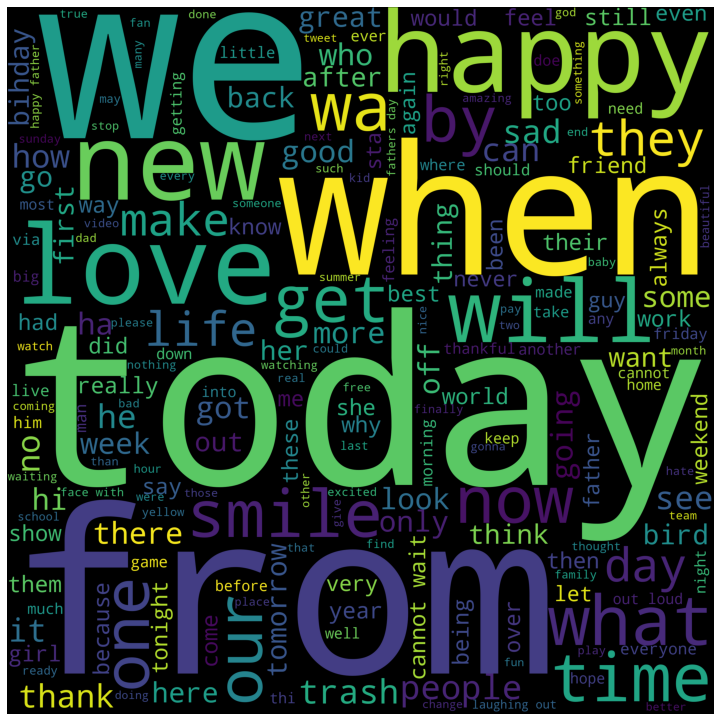

In [560]:
showWordCloud(train[train["class"] == 0].tweet)

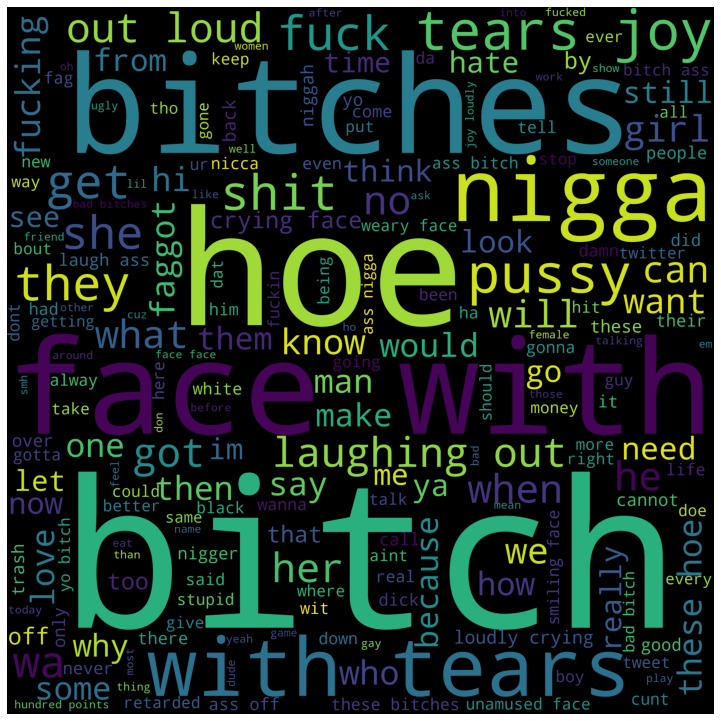

In [561]:
showWordCloud(train[train["class"] == 1].tweet)

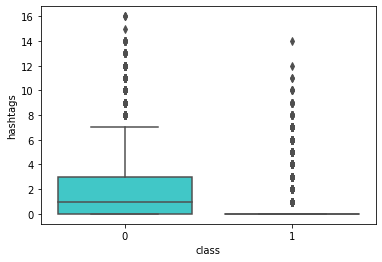

In [562]:
sns.boxplot(x='class',y='hashtags',data=train,palette='rainbow')

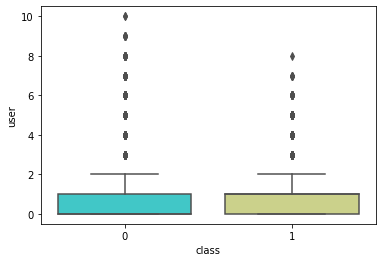

In [563]:
sns.boxplot(x='class',y='user',data=train,palette='rainbow')

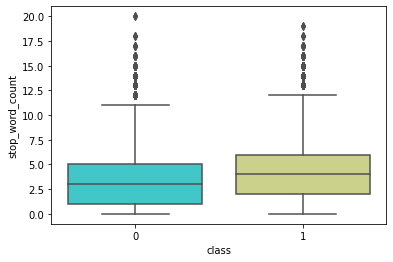

In [564]:
sns.boxplot(x='class',y='stop_word_count',data=train,palette='rainbow')

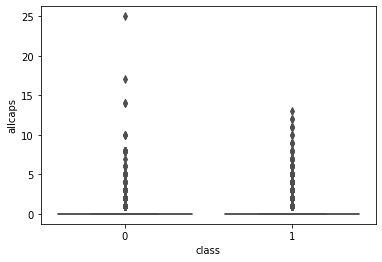

In [565]:
sns.boxplot(x='class',y='allcaps',data=train,palette='rainbow')

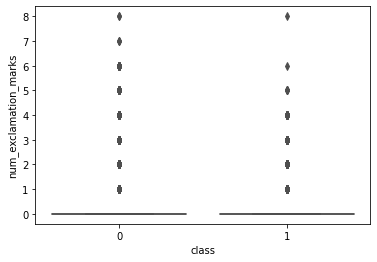

In [566]:
sns.boxplot(x='class',y='num_exclamation_marks',data=train,palette='rainbow')

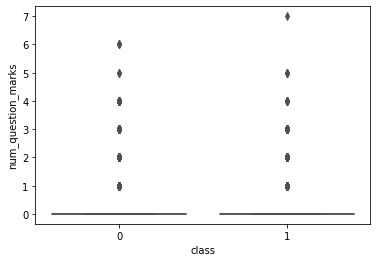

In [567]:
sns.boxplot(x='class',y='num_question_marks',data=train,palette='rainbow')


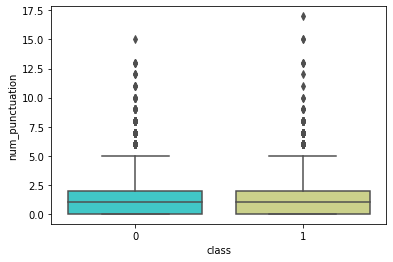

In [568]:
sns.boxplot(x='class',y='num_punctuation',data=train,palette='rainbow')

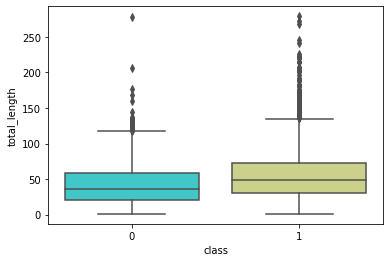

In [569]:
sns.boxplot(x='class',y='total_length',data=train,palette='rainbow')

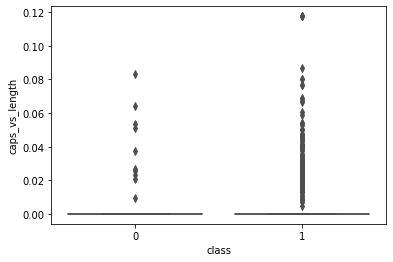

In [570]:
sns.boxplot(x='class',y='caps_vs_length',data=train,palette='rainbow')

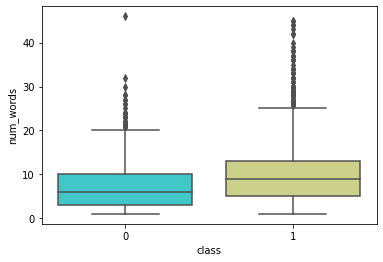

In [571]:

sns.boxplot(x='class',y='num_words',data=train,palette='rainbow')

In [578]:
len(train[train.num_words>2].tweet)

37624

In [579]:
len(train[train.num_words==1])

1456

In [581]:
train[train.total_length==2].tweet

851      we
1501     pa
8354     we
11667    of
12854    ok
13021    np
16374    no
16591    ok
18494    we
22333    oh
27432    ok
27736    ad
30413    xx
32303    me
34583    pa
35666    by
35817    to
36846    ok
37078    me
37340    mm
41006    we
Name: tweet, dtype: object

In [582]:
train[train.total_length==1].tweet

4248     d
4376     s
6499     h
11243    f
19836    s
23044    s
28884    u
29334    a
31821    o
36071    s
36784    s
Name: tweet, dtype: object

In [729]:
vec = TfidfVectorizer(ngram_range=(2,2),max_features=10000,stop_words=["has","face","he","by","one"])
train_tfidf0 = vec.fit_transform(train[train["class"]==1].tweet)

In [584]:
%run ../src/processing/glove_utils.py

<Figure size 432x288 with 0 Axes>

In [730]:
word,frequency = get_top_n_words(100,vec,train_tfidf0)

In [411]:
def horizontal_bar_chart(w,f,color):
    trace = go.Bar(
        y= w[::-1],
        x= f[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [728]:
trace0 = horizontal_bar_chart(word,frequency, 'green')

In [731]:
trace1 = horizontal_bar_chart(word,frequency, 'blue')

In [711]:
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of non-hate", 
                                          "Frequent words of hate"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')


/home/sandhya/Project/final/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



# bigram

In [704]:
#combination 1,2
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of non-hate", 
                                          "Frequent words of hate"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')


/home/sandhya/Project/final/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [732]:
#only 2
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of non-hate", 
                                          "Frequent words of hate"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')


/home/sandhya/Project/final/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



# trigrams

In [718]:
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of non-hate", 
                                          "Frequent words of hate"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')


/home/sandhya/Project/final/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [725]:
#only 3
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of non-hate", 
                                          "Frequent words of hate"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')


/home/sandhya/Project/final/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

